In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, sys, lzma, os
from IPython.display import Markdown

datadir = 'data'

sys.path.insert(0,'C:/git/StrathLab/libs') #Lab PC
sys.path.insert(0,'D:/Repositories/StrathLab/libs') #XMG
import StrathLabToolkit as lab
datadir_full = os.path.join(os.getcwd(),datadir)

In [3]:
datafiles = lab.Get_Files_From_Dir(datadir_full)
for dfile in datafiles:
    display (Markdown(f'{dfile}'))

01_TUe_3um_Anritsu-K251_1.05V.pkl.lz

02_TUe_S1-O.5C1_3um_Anritsu-K251_1.05V.pkl.lz

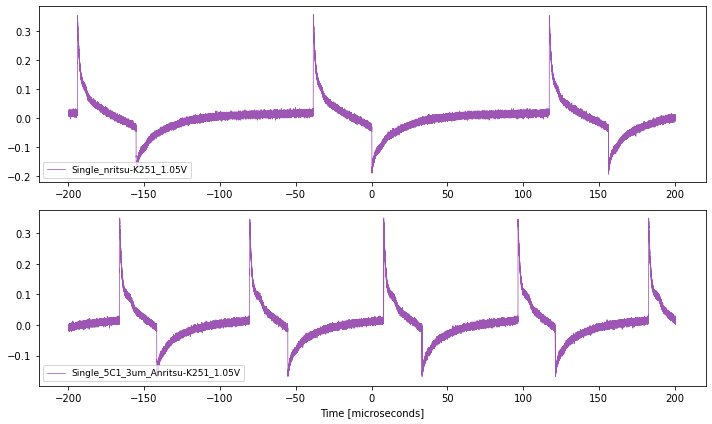

In [8]:
datafiles = lab.Get_Files_From_Dir(datadir_full)
dfile_count=len(datafiles)
fig,ax = plt.subplots(dfile_count,1,figsize=(10,dfile_count*3))
ii = 0
colors1 = ('xkcd:deep purple','xkcd:dark green')

lookup = '0'

for dfile in datafiles:
    if lookup in dfile:
        with lzma.open((os.path.join(datadir_full,dfile)),"rb") as f:
            if ".pkl.lz" in dfile:
                data = pickle.load(f)
                jjj = 0
                ax[ii].plot(np.linspace(*data.readout_osc_0["xpar"])*1e6,
                            data.readout_osc_0[f"y{jjj}"],
                            lw=0.75, color='xkcd:purple',
                            label='Single_'+dfile[12:-7],
                            alpha=.75)

                ax[ii].legend(loc='lower left',fontsize=9)
                ii=ii+1
ax[-1].set_xlabel('Time [microseconds]')
fig.tight_layout()
fig.savefig('Data_Overview.png',dpi=240)